In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from collections import Counter

from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS 
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
stop_words = stopwords.words('english')


reviews = pd.read_csv('reviews.csv')
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')

## Business Understanding

Using this dataset, there are a list of questions I am curious to answer. They are:
 
#### 1) What are the most popular neighbourhoods in Boston, aka which neighbourhoods in Boston have the most homes listed on Airbnb?

#### 2) Which neighbourhoods have the best rated homes on average, and what have the users said about them in their reviews?

#### 3) How do the average prices look for each neighbourhood?

## Data Understanding

Let's take a look of the data we are interested in, mainly the reviews and listings data frames.

In [2]:
len(reviews)

68275

In [3]:
len(listings)

3585

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [6]:
len(reviews)

68275

So for reviews, we will be mainly interested in the comments and the listing_id. Looks like we have a total of 68275 reviews.

In [7]:
reviews['comments'].isnull().sum()

53

There's 53 listings here without any reviews. We will take care of this a bit later in the notebook when we will do some dataframe manipulation.

In [8]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

How many listings do we have in each given neighbourhood? Let's see in the next cell.

In [9]:
listings['neighbourhood'].value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Somerville             13
Financial District     13
Leather District        8
Downtown                8
Brookline               8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

## Data Preparation

#### Let's prepare our data to help us find the average ratings for homes based on their neighbourhood.

In [10]:
average_scores = listings.groupby('neighbourhood', as_index=False)['review_scores_rating'].mean()

In [11]:
average_scores.head()

,neighbourhood,review_scores_rating
0,Allston-Brighton,90.067164
1,Back Bay,91.531818
2,Beacon Hill,93.811688
3,Brookline,100.000000
4,Cambridge,74.500000


In [12]:
listings[listings['neighbourhood'] == 'Harvard Square'].review_scores_rating

3567   NaN
3572   NaN
Name: review_scores_rating, dtype: float64

Let's drop Harvard Square from this average DataFrame. There's only 2 airbnb's in this location, both of which don't have scores, so we're not losing much info.

In [13]:
average_scores = average_scores.dropna(subset = ['review_scores_rating'], axis=0)

In [14]:
average_scores = average_scores.sort_values(by=['review_scores_rating'])

#### The following is data preparation for our second question, neighbourhoods that have the best rated homes on average.

In [15]:
type(reviews['comments'][23])

str

In [16]:
reviews['comments'] = reviews['comments'].astype(str)

In [17]:
#reviews['comments']

In [18]:
x = reviews.groupby(['listing_id'])['comments'].transform(lambda x : ' '.join(x))

Append this to the reviews dataframe

In [19]:
reviews['reviews_all'] = x

In [20]:
#reviews

Now we'll make a dataframe of only unique listing_id values becuase we already have all the reviews grouped together.

In [21]:
reviews_per_airbnb = reviews.drop_duplicates(subset = ['listing_id'])

In [22]:
reviews_per_airbnb.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,reviews_all
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,My stay at islam's place was really cool! Good...
215,7246272,49011639,2015-09-30,41266959,Juliano,My wife and I had a great experience while sta...,My wife and I had a great experience while sta...
252,13658522,91461976,2016-08-05,86755439,Stephanie,Giulio's roommate Nikolai was friendly and acc...,Giulio's roommate Nikolai was friendly and acc...
255,9364092,57999038,2015-12-31,1211289,Hani,The host canceled this reservation 13 days bef...,The host canceled this reservation 13 days bef...
260,12069214,71523790,2016-04-25,1091782,Kevin,Location is phenomenal. Host was super friend...,Location is phenomenal. Host was super friend...


In [23]:
len(reviews_per_airbnb['reviews_all'].unique())

2813

In [24]:
listings_new = listings.merge(reviews_per_airbnb, how='left', left_on='id', right_on='listing_id')

We're only interested in those with reviews and not those with NAN values.

In [25]:
listings_new = listings_new.dropna(subset=['reviews_all'])

Now, we group all the reviews by neighbourhood.

In [26]:
listings_new = listings_new.sort_values('neighbourhood')

In [27]:
#listings_new[['neighbourhood', 'reviews_all']]

In [28]:
listings_new = listings_new.dropna(subset=['neighbourhood'])

In [29]:
y = listings_new.groupby(['neighbourhood'])['reviews_all'].transform(lambda x : ' '.join(x))
#Had to drop the nan values under the neighborhood column for this line of code to work.
#Again, we're only interested in Airbnb's with reviews, and w/ Airbnb's that are categorized under a neighbourhood.

In [30]:
listings_new['grouped_reviews_all'] = y

In [31]:
listings_new.head()

,id_x,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments,reviews_all,grouped_reviews_all
2548,10333345,https://www.airbnb.com/rooms/10333345,20160906204935,2016-09-07,Beautiful room in hipster town,I'm having one room of my apartment for rent i...,This is a spacious room with a lot of thing in...,I'm having one room of my apartment for rent i...,none,Brighton is a dissolved municipality and curre...,I will be doing the drop-off and pick-up servi...,It is a walkable and bikeable city so it is ne...,Ill show up to hand the key when the guests ar...,It is very easy to interact with me. I am very...,This is two bedroom located in the heart of Br...,https://a2.muscache.com/im/pictures/902e9b3f-a...,https://a2.muscache.com/im/pictures/902e9b3f-a...,https://a2.muscache.com/im/pictures/902e9b3f-a...,https://a2.muscache.com/im/pictures/902e9b3f-a...,15575274,https://www.airbnb.com/users/show/15575274,Sa,2014-05-15,"Boston, Massachusetts, United States","I consider myself sweet, honest, fun, outgoing...",within an hour,100%,100%,f,https://a1.muscache.com/im/users/15575274/prof...,https://a1.muscache.com/im/users/15575274/prof...,Allston-Brighton,2,2,"['email', 'phone', 'amex', 'reviews', 'jumio']",t,t,"Woodstock Avenue, Boston, MA 02135, United States",Allston-Brighton,Brighton,NaN,Boston,MA,02135,Boston,"Boston, MA",US,United States,42.345985,-71.136397,t,Apartment,Private room,1,0.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$81.00,NaN,NaN,$100.00,$70.00,1,$30.00,1,1125,today,NaN,9,39,69,344,2016-09-06,17,2016-03-01,2016-09-05,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,strict,f,f,2,2.67,10333345.0,64248705.0,2016-03-01,57654487.0,Ajay,Sa was a great host. He made sure I had everyt...,Sa was a great host. He made sure I had everyt...,Sa was a great host. He made sure I had everyt...
3309,3677662,https://www.airbnb.com/rooms/3677662,20160906204935,2016-09-07,Room in stylish 2-bedroom flat.,This cozy period brownstone apartment is in th...,Old-style apartment reminiscent of pre-WWI bro...,This cozy period brownstone apartment is in th...,none,"I love the Bohemian atmosphere, the amazing se...","Family-friendly, low-crime neighborhood. That ...",There are buses to downtown and Harvard Square...,Washer and dryer in basement. All the restaura...,I'm available as needed for any questions.,Professionally and to respect the artwork. Thi...,https://a2.muscache.com/im/pictures/46289617/e...,https://a2.muscache.com/im/pictures/46289617/e...,https://a2.muscache.com/im/pictures/46289617/e...,https://a2.muscache.com/im/

Now we look at the unique neighbourhoods

In [32]:
listings_neighbourhoods = listings_new.drop_duplicates(subset=['neighbourhood'])

In [33]:
listings_neighbourhoods = listings_neighbourhoods[['neighbourhood', 'grouped_reviews_all']]

In [34]:
average_scores = listings_new.groupby('neighbourhood', as_index=False)['review_scores_rating'].mean()

Now we can append the reviews from listings_neighbourhoods onto average_scores!

In [35]:
scores_reviews = average_scores.merge(listings_neighbourhoods, on='neighbourhood')

In [36]:
scores_reviews.sort_values(by=['review_scores_rating'])

,neighbourhood,review_scores_rating,grouped_reviews_all
4,Cambridge,74.500000,"The location was nice, however the sheets were..."
9,Downtown,83.285714,The reservation was canceled 34 days before ar...
19,Mission Hill,87.550725,Very quiet and nice place to stay. Carl and Ce...
18,Mattapan,88.500000,A very welcoming stay! Lorna was very understa...
23,Somerville,88.571429,Medi is an attentive guy with a positive attit...
12,Fenway/Kenmore,89.349693,"Lovely apartment, very cozy and in a very conv..."
26,Theater District,89.363636,Last minute booking for me so I was not too pi...
8,Dorchester,89.579882,It was nice meeting you. I had a great stay at...
11,East Boston,89.745283,The host canceled this reservation 24 days bef...
6,Chestnut Hill,90.000000,"The room was large and clean, with a comfortab..."


#### IT WORKED. 

Here we have all the reviews for all homes in a row for each given neighbourhood.

Now we clean the text and gather the most used phrases.

But first we will create two dataframes, one containing the neighbourhoods that scored below 90% on average and one containing those that scored above 90% on average.

In [37]:
options = ['Cambridge', 'Downtown']

In [38]:
below_90 = scores_reviews[scores_reviews['neighbourhood'].isin(options)]

In [39]:
below_90.head()

,neighbourhood,review_scores_rating,grouped_reviews_all
4,Cambridge,74.500000,"The location was nice, however the sheets were..."
9,Downtown,83.285714,The reservation was canceled 34 days before ar...


In [40]:
above_90 = scores_reviews[~scores_reviews['neighbourhood'].isin(options)] #get's all neighbourhoods not in options list

In [55]:
above_90.head()

,neighbourhood,review_scores_rating,grouped_reviews_all
0,Allston-Brighton,90.067164,Sa was a great host. He made sure I had everyt...
1,Back Bay,91.531818,We had a terrific time there! A great place to...
2,Beacon Hill,93.811688,"The apartment was very well-located, practical..."
3,Brookline,100.000000,"I enjoyed my stay. The host is great, very we..."
5,Charlestown,94.147541,"I am a big fan of airbnb, and i love to travel..."


In [56]:
def lem(sentences):
    """Lemmatizes the sentence that is being passed into the function."""
    clean_sentences = []
    lemmatizer=WordNetLemmatizer()
    for sentence in sentences:
        clean_words = []
        for word in sentence:
            clean_words.append(lemmatizer.lemmatize(word))
        clean_sentences.append(clean_words)
    return clean_sentences

In [57]:
print(lem.__doc__)

Lemmatizes the sentence that is being passed into the function.


In [58]:
def rem_stop_words(sentences):
    """Returns a list of sentences containing words not found in stop_words."""
    clean_sentences = []
    for sentence in sentences:
        clean_words = []
        for word in sentence:
            if word not in stop_words:
                clean_words.append(word)
        clean_sentences.append(clean_words)
    return clean_sentences

In [59]:
print(rem_stop_words.__doc__)

Returns a list of sentences containing words not found in stop_words.


In [60]:
def eng_sents(sentences):
    """Returns a list of sentences in english."""
    words = set(nltk.corpus.words.words())
    clean_sentences = []
    for sentence in sentences:
        count_english = 0
        count_not_english = 0
        for word in sentence:
            if word not in words:
                count_not_english +=1
            else:
                count_english +=1
        if count_english > count_not_english:
            clean_sentences.append(sentence)
    return clean_sentences

In [61]:
print(eng_sents.__doc__)

Returns a list of sentences in english.


In [62]:
def tokenize(sentences):
    """Returns a tokenized version of the sentence that is passed into the function."""
    tokens = []
    tokenizer = RegexpTokenizer(r'\w+')
    for sentence in sentences:
        tokens.append(tokenizer.tokenize(sentence))
    return tokens

In [63]:
print(tokenize.__doc__)

Returns a tokenized version of the sentence that is passed into the function.


In [64]:
def preprocess(sentences):
    """Returns a preprocessed version of the sentence passed into the function"""
    return lem(rem_stop_words(eng_sents(tokenize(sentences))))

In [65]:
print(preprocess.__doc__)

Returns a preprocessed version of the sentence passed into the function


In [66]:
lowercase_sent = [str(x).lower() for x in list(above_90['grouped_reviews_all'])]

In [67]:
lowercase_sent2 = [str(x).lower() for x in list(below_90['grouped_reviews_all'])]

In [68]:
sentences_processed = preprocess(lowercase_sent)

In [69]:
#sentences_processed

In [70]:
sentences_processed2 = preprocess(lowercase_sent2)

In [71]:
#sentences_processed2

Here, sentences_processed is a 2d list because for every Airbnb, there is a review. Each review has its processed set of words.
Now we want the most occuring phrases in ALL reviews.

Now, let's flatten these two 2d lists.

In [72]:
flat = reduce(list.__add__, (list(items) for items in sentences_processed))

In [73]:
flat2 = reduce(list.__add__, (list(items) for items in sentences_processed2))

Now let's take a look at the common *phrases* in the descriptions of the dataframe.

In [74]:
word_counts= Counter(flat)

top_words= word_counts.most_common(20)

In [75]:
top_words

[('great', 36241),
 ('stay', 32067),
 ('place', 29561),
 ('boston', 29435),
 ('apartment', 25581),
 ('location', 20662),
 ('clean', 20660),
 ('host', 19951),
 ('u', 19542),
 ('room', 19189),
 ('would', 16946),
 ('nice', 16874),
 ('comfortable', 14401),
 ('house', 13504),
 ('everything', 12411),
 ('time', 12213),
 ('easy', 11779),
 ('recommend', 11254),
 ('really', 11234),
 ('well', 10624)]

In [76]:
flat2 = reduce(list.__add__, (list(items) for items in sentences_processed2))

In [77]:
word_counts= Counter(flat2)

top_words2= word_counts.most_common(20)

In [78]:
top_words2

[('apartment', 128),
 ('great', 90),
 ('location', 83),
 ('stay', 64),
 ('boston', 58),
 ('host', 48),
 ('would', 47),
 ('place', 46),
 ('u', 42),
 ('well', 40),
 ('ellen', 40),
 ('nice', 36),
 ('clean', 32),
 ('everything', 29),
 ('time', 29),
 ('walk', 28),
 ('bar', 28),
 ('check', 25),
 ('easy', 25),
 ('night', 25)]

In [79]:
top_words_df = pd.DataFrame(top_words, columns =['Word', 'Count']) 
#top_words_df.head()

In [80]:
top_words_df2 = pd.DataFrame(top_words2, columns =['Word', 'Count']) 
#top_words_df2.head()

#### Now we will find the mean of prices based on each neighbourhood

In [81]:
listings['price_float'] = listings['price'].replace('[\$\,]', '', regex=True).astype(float)

In [82]:
listings['price']

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [83]:
listings['price_float']

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price_float, Length: 3585, dtype: float64

In [84]:
average_prices = listings.groupby('neighbourhood', as_index=False)['price_float'].mean()

In [85]:
average_prices['price_float'] = average_prices['price_float'].round(decimals=2)

In [86]:
average_prices = average_prices.sort_values(by='price_float', ascending=False)

#### Now the data preprocessing is done!

## Results

## 1) What are the most popular neighbourhoods in Boston, aka which neighbourhoods in Boston have the most homes listed on Airbnb?


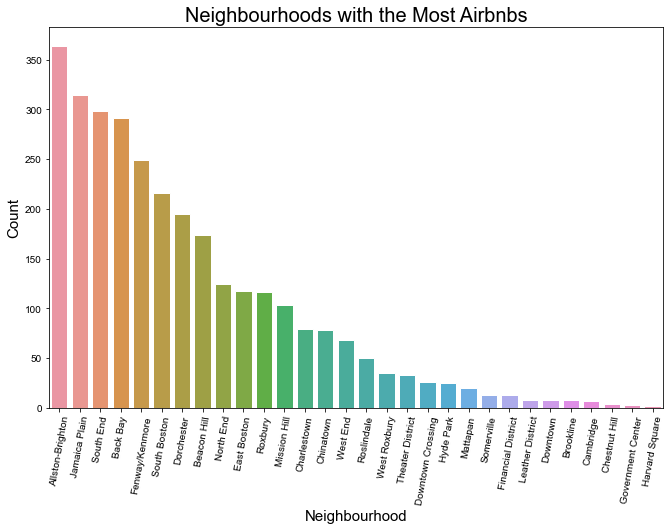

In [87]:
fig, bar = plt.subplots(figsize = (11,7))
sns.set(style='darkgrid')
sns.countplot(x = 'neighbourhood',
              data = listings,
              order = listings['neighbourhood'].value_counts().index,
             )
plt.xticks(rotation=80);
plt.xlabel('Neighbourhood', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Neighbourhoods with the Most Airbnbs', fontsize = 20)
plt.show()

These are the amount of AirBnB's in each of the neighbourhoods in Boston. It looks like Jamaica Plain, Fenway/Kenmore, Back Bay, South End, and Allston-Brighton have the most Airbnb's to choose from.

What are the average review_scores_ratings for each of these neighbourhoods? Do some parts of Boston score higher than others?

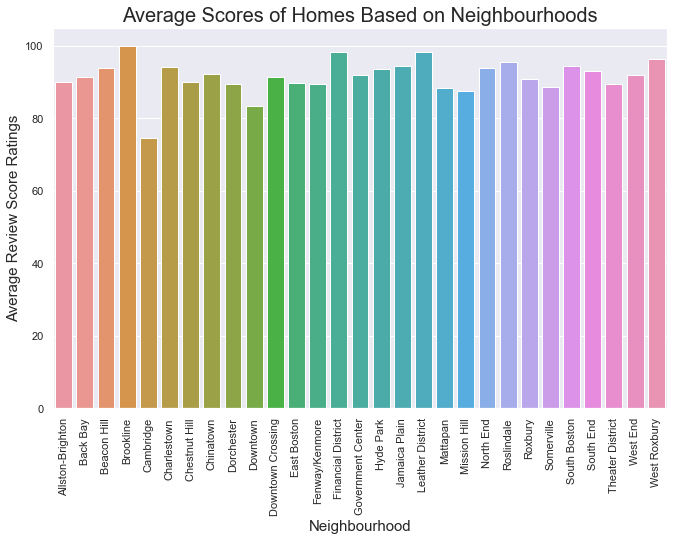

In [88]:
fig, bar = plt.subplots(figsize = (11,7))
sns.barplot(x='neighbourhood', y='review_scores_rating', data=average_scores)
bar.set_ylabel('Average Review Score Ratings',fontsize = 15)
bar.set_xlabel('Neighbourhood', fontsize = 15)
plt.title('Average Scores of Homes Based on Neighbourhoods', fontsize=20)
plt.xticks(rotation=90);

With the exception of Cambridge, the average ratings tend to hover slightly above 80% and higher.



## 2) Which neighbourhoods have the best rated homes on average, and what have the users said about them in their reviews?

This one is going to be a bit more extensive in terms of dataframe manipulation. We want to gather all the reviews of every Airbnb from reviews_df, and merge it with the listings_df. From there, we will group by all the reviews together for every Airbnb by Neighborhood.


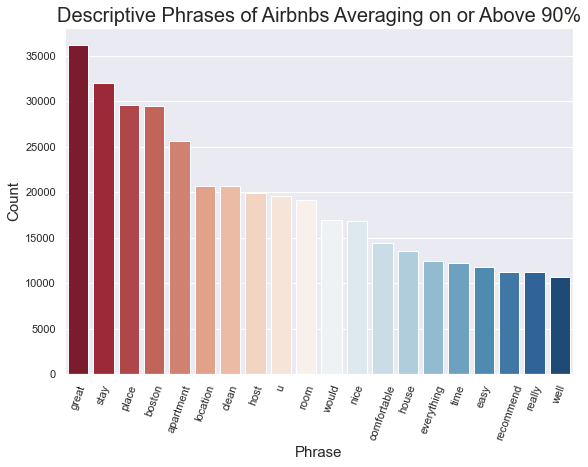

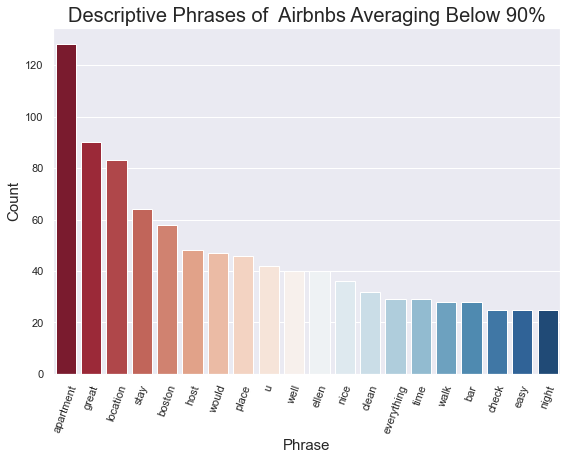

In [89]:
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
ax1 = sns.barplot(data=top_words_df, x='Word', y='Count', palette = 'RdBu')
plt.xlabel('Phrase', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=70);
plt.title('Descriptive Phrases of Airbnbs Averaging on or Above 90%', fontsize=20);

plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
ax2 = sns.barplot(data=top_words_df2, x='Word', y='Count', palette = 'RdBu')
plt.xlabel('Phrase', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=70);
plt.title('Descriptive Phrases of  Airbnbs Averaging Below 90%', fontsize=20);

We see that for Airbnb's that have an average score of below 90%, there are some key phrases that don't appear, such as *comfortable, house,* and *recommend*.

Maybe you'd want to look out for these key words in the user reviews if you're looking for a nice Airbnb in Boston.

## 3) How do the average prices look for each neighbourhood?

Find mean of prices based on neighbourhood

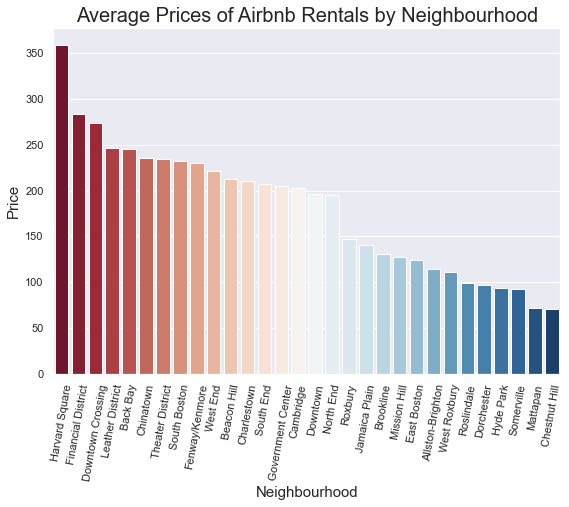

In [90]:
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
ax2 = sns.barplot(data=average_prices, x='neighbourhood', y='price_float', palette = 'RdBu')
plt.xticks(rotation=80);
plt.xlabel('Neighbourhood', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Average Prices of Airbnb Rentals by Neighbourhood', fontsize=20);

Looks like Airbnb's in Harvard Square are the most expensive on average, while those in the Financial District down to North End tend to be in the 200 to 285 dollar price range.